# E-  Commerce Customer Device Usage - Linear Regression

### Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer information such as Email and Address. It also has numerical value columns:

   * Avg. Session Length: Average session of in-store style advice sessions.
   * Time on App: Average time spent on App in minutes
   * Time on Website: Average time spent on Website in minutes    
   * Length of Membership: Number of years the customer has been a member.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv('ecommerce.csv')

In [3]:
customers.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
sns.set_palette("gnuplot2")
sns.set_style('whitegrid')

## Exploratory Data Analysis
Let is use seaborn to create a joinplot to compare the Time on Website and Yearly Amount Spent

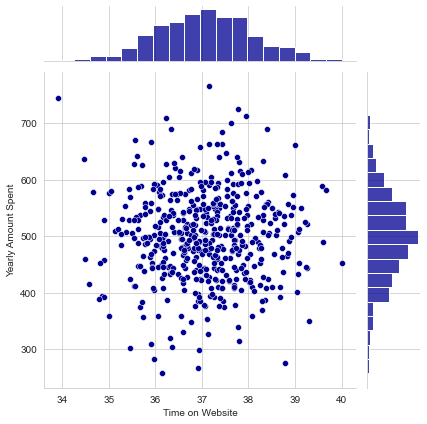

In [7]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data = customers)

Now, with Time on App

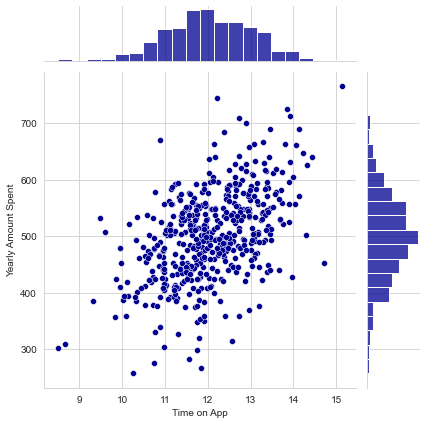

In [8]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data =customers)

Let us use joinplot to create a 2D hex bin plot comparing Time on App and Length Of Membership

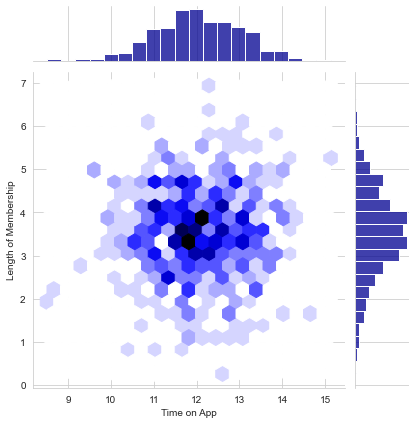

In [9]:
sns.jointplot(x='Time on App',y = 'Length of Membership', data = customers, kind ='hex')

Let's explore these types of relationships across the entire data set.

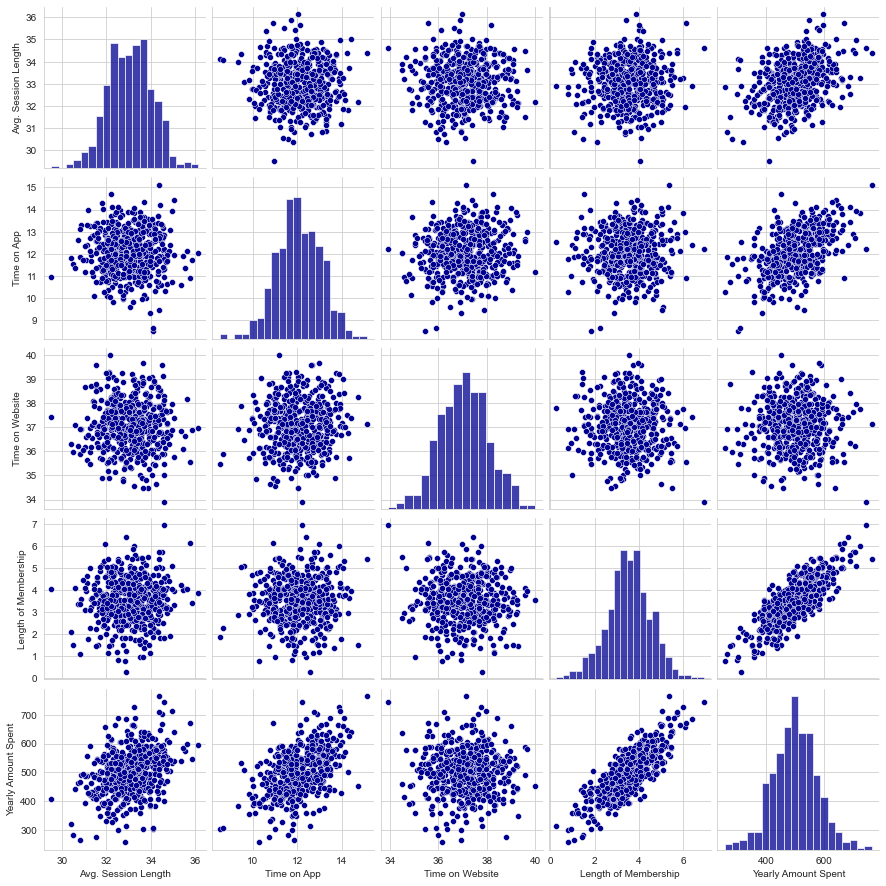

In [10]:
sns.pairplot(customers)

We will now create a linear model plot of Yearly Amount Spent vs Length of Membership

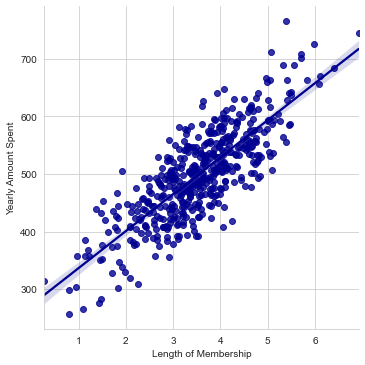

In [11]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data =customers)

## Training and Testing the data

In [12]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

## Training the model

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

Let us print the co-efficients

In [17]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have our best fit model, let us evaluate its performance by predicting off the test values

In [18]:
predictions = lm.predict(X_test)

Let us create a scatterplot of the real test values vs predcited values

Text(0, 0.5, 'Predicted Y')

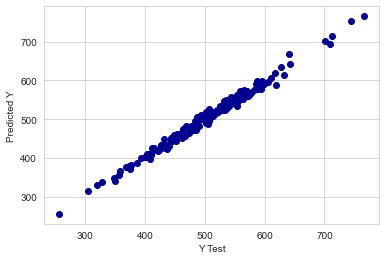

In [19]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test') 
plt.ylabel('Predicted Y')


In [20]:
from sklearn import metrics

## Evaluating our model
Let us no evaluate our model performance by calculating the residual sum of squares and R^2 score.

In [21]:
print('MAE :%.2f' %metrics.mean_absolute_error(y_test,predictions))
print('MSE :%.2f' %metrics.mean_squared_error(y_test,predictions))
print('RMAE :%.2f' %np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :7.23
MSE :79.81
RMAE :8.93


## Residuals

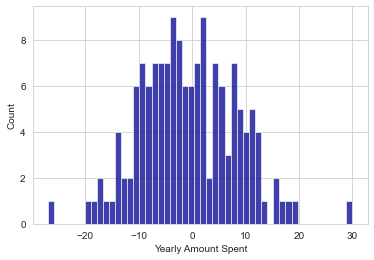

In [22]:
sns.histplot(y_test - predictions, bins =50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our effort on the mobile app or the website development? Or maybe it does not even matter, and Membership Time is what really matters. 

In [23]:
coeff = pd.DataFrame(lm.coef_,X.columns)
coeff.columns= ['Coefficients']
coeff

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097




## How can you interpret these coefficients?

Interpreting the coefficients:

   * Holding all other features fixed, a 1 unit increase in <b>Avg. Session Length</b> is associated with an increase of 25.98 total dollars spent.
   * Holding all other features fixed, a 1 unit increase in <b>Time on App</b> is associated with an increase of 38.59 total dollars spent.
   * Holding all other features fixed, a 1 unit increase in <b>Time on Website</b> is associated with an increase of 0.19 total dollars spent.
   * Holding all other features fixed, a 1 unit increase in <b>Length of Membership</b> is associated with an increase of 61.27 total dollars spent.

Do you think the company should focus more on their mobile app or on their website?

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
